In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df=pd.read_csv('C:/Tenserflow/TensorFlow_FILES/DATA/cancer_classification.csv')

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

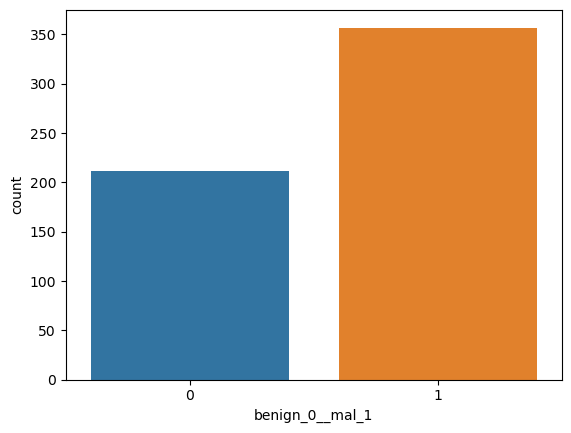

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

<Axes: >

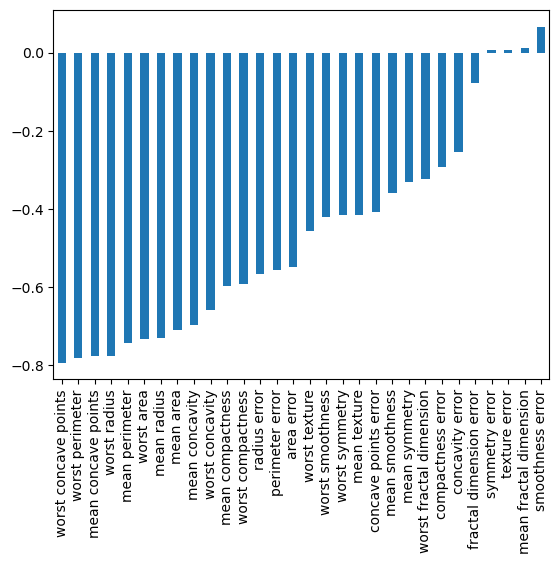

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

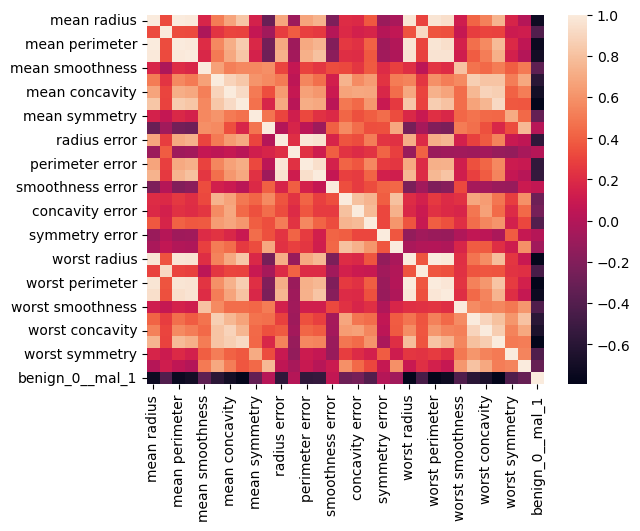

In [10]:
sns.heatmap(df.corr())

In [11]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import  MinMaxScaler

In [16]:
scaler=MinMaxScaler()

In [18]:
X_train=scaler.fit_transform(X_train)

In [19]:
X_test=scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.layers import Dense,Dropout

In [22]:
X_train.shape

(426, 30)

In [24]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [25]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 4s 45ms/step - loss: 0.6743 - val_loss: 0.6491
Epoch 2/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6259 - val_loss: 0.6010
Epoch 3/600
14/14 [==============================] - 0s 12ms/step - loss: 0.5770 - val_loss: 0.5492
Epoch 4/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5241 - val_loss: 0.4927
Epoch 5/600
14/14 [==============================] - 0s 13ms/step - loss: 0.4657 - val_loss: 0.4300
Epoch 6/600
14/14 [==============================] - 0s 20ms/step - loss: 0.4076 - val_loss: 0.3731
Epoch 7/600
14/14 [==============================] - 0s 15ms/step - loss: 0.3580 - val_loss: 0.3254
Epoch 8/600
14/14 [==============================] - 0s 26ms/step - loss: 0.3171 - val_loss: 0.2862
Epoch 9/600
14/14 [==============================] - 0s 19ms/step - loss: 0.2847 - val_loss: 0.2567
Epoch 10/600
14/14 [==============================] - 0s 25ms/step - loss: 0.2579 - val_loss: 0.2331

14/14 [==============================] - 0s 9ms/step - loss: 0.0511 - val_loss: 0.1183
Epoch 83/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0523 - val_loss: 0.1214
Epoch 84/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0521 - val_loss: 0.1101
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0553 - val_loss: 0.1153
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0510 - val_loss: 0.1208
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0515 - val_loss: 0.1171
Epoch 88/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0508 - val_loss: 0.1184
Epoch 89/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0490 - val_loss: 0.1111
Epoch 90/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0518 - val_loss: 0.1230
Epoch 91/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0498 - val_loss: 0.1125
Epoch 92/600

Epoch 163/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0436 - val_loss: 0.1247
Epoch 164/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0421 - val_loss: 0.1190
Epoch 165/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0388 - val_loss: 0.1328
Epoch 166/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0383 - val_loss: 0.1186
Epoch 167/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0382 - val_loss: 0.1222
Epoch 168/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0379 - val_loss: 0.1230
Epoch 169/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0378 - val_loss: 0.1181
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0372 - val_loss: 0.1305
Epoch 171/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0417 - val_loss: 0.1275
Epoch 172/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0403 - val_los

14/14 [==============================] - 0s 11ms/step - loss: 0.0341 - val_loss: 0.1353
Epoch 244/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0308 - val_loss: 0.1397
Epoch 245/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0306 - val_loss: 0.1316
Epoch 246/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0327 - val_loss: 0.1398
Epoch 247/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0310 - val_loss: 0.1366
Epoch 248/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0323 - val_loss: 0.1406
Epoch 249/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0310 - val_loss: 0.1423
Epoch 250/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0299 - val_loss: 0.1446
Epoch 251/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0296 - val_loss: 0.1382
Epoch 252/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0322 - val_loss: 0.14

Epoch 324/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0229 - val_loss: 0.1438
Epoch 325/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0232 - val_loss: 0.1521
Epoch 326/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0236 - val_loss: 0.1482
Epoch 327/600
14/14 [==============================] - 0s 18ms/step - loss: 0.0230 - val_loss: 0.1444
Epoch 328/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0239 - val_loss: 0.1631
Epoch 329/600
14/14 [==============================] - 0s 17ms/step - loss: 0.0230 - val_loss: 0.1407
Epoch 330/600
14/14 [==============================] - 0s 21ms/step - loss: 0.0237 - val_loss: 0.1494
Epoch 331/600
14/14 [==============================] - 0s 19ms/step - loss: 0.0232 - val_loss: 0.1432
Epoch 332/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0244 - val_loss: 0.1559
Epoch 333/600
14/14 [==============================] - 0s 16ms/step - loss: 0.0232

14/14 [==============================] - 0s 8ms/step - loss: 0.0187 - val_loss: 0.1688
Epoch 405/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0193 - val_loss: 0.1558
Epoch 406/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0197 - val_loss: 0.1712
Epoch 407/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0188 - val_loss: 0.1682
Epoch 408/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0184 - val_loss: 0.1566
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0187 - val_loss: 0.1733
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0179 - val_loss: 0.1592
Epoch 411/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0206 - val_loss: 0.1715
Epoch 412/600
14/14 [==============================] - 0s 15ms/step - loss: 0.0206 - val_loss: 0.1681
Epoch 413/600
14/14 [==============================] - 0s 14ms/step - loss: 0.0184 - val_loss: 0.1677
Ep

14/14 [==============================] - 0s 8ms/step - loss: 0.0178 - val_loss: 0.1707
Epoch 485/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0157 - val_loss: 0.1797
Epoch 486/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0146 - val_loss: 0.1963
Epoch 487/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0141 - val_loss: 0.1728
Epoch 488/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0155 - val_loss: 0.1941
Epoch 489/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0156 - val_loss: 0.1883
Epoch 490/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0185 - val_loss: 0.1748
Epoch 491/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0175 - val_loss: 0.1969
Epoch 492/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0190 - val_loss: 0.1863
Epoch 493/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0134 - val_loss: 0.1876
Epoc

Epoch 565/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0119 - val_loss: 0.2174
Epoch 566/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0107 - val_loss: 0.2200
Epoch 567/600
14/14 [==============================] - 0s 12ms/step - loss: 0.0103 - val_loss: 0.2053
Epoch 568/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0103 - val_loss: 0.2136
Epoch 569/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0142 - val_loss: 0.2016
Epoch 570/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0134 - val_loss: 0.2284
Epoch 571/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0109 - val_loss: 0.2048
Epoch 572/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0104 - val_loss: 0.2047
Epoch 573/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0099 - val_loss: 0.2198
Epoch 574/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0112 - val

In [27]:
losses=pd.DataFrame(model.history.history)

<Axes: >

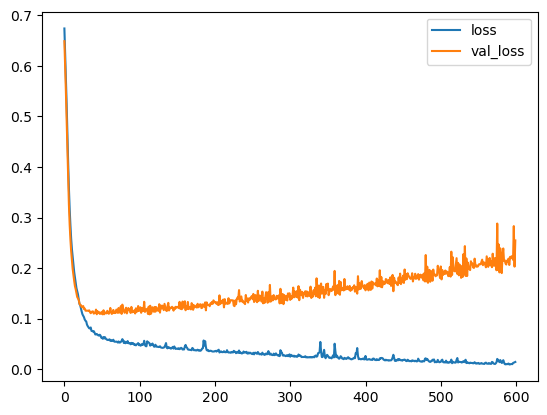

In [28]:
losses.plot()

In [30]:
model=Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
#help(EarlyStopping)

In [34]:
early_stop=EarlyStopping(monitor='val_loss', patience=25, verbose=1, mode='min')


In [35]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 3s 58ms/step - loss: 0.6921 - val_loss: 0.6787
Epoch 2/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6573 - val_loss: 0.6447
Epoch 3/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6218 - val_loss: 0.6028
Epoch 4/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5737 - val_loss: 0.5535
Epoch 5/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5290 - val_loss: 0.5075
Epoch 6/600
14/14 [==============================] - 0s 18ms/step - loss: 0.4835 - val_loss: 0.4614
Epoch 7/600
14/14 [==============================] - 0s 18ms/step - loss: 0.4374 - val_loss: 0.4132
Epoch 8/600
14/14 [==============================] - 0s 15ms/step - loss: 0.3933 - val_loss: 0.3680
Epoch 9/600
14/14 [==============================] - 0s 15ms/step - loss: 0.3494 - val_loss: 0.3173
Epoch 10/600
14/14 [==============================] - 0s 15ms/step - loss: 0.3050 - val_loss: 0.2755

14/14 [==============================] - 0s 9ms/step - loss: 0.0535 - val_loss: 0.1138
Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0527 - val_loss: 0.1092
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0547 - val_loss: 0.1124
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0536 - val_loss: 0.1168
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0526 - val_loss: 0.1088
Epoch 87/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0524 - val_loss: 0.1130
Epoch 88/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0515 - val_loss: 0.1126
Epoch 89/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0517 - val_loss: 0.1125
Epoch 90/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0543 - val_loss: 0.1140
Epoch 91/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0533 - val_loss: 0.1137
Epoch 92/600


In [36]:
model_loss=pd.DataFrame(model.history.history)

<Axes: >

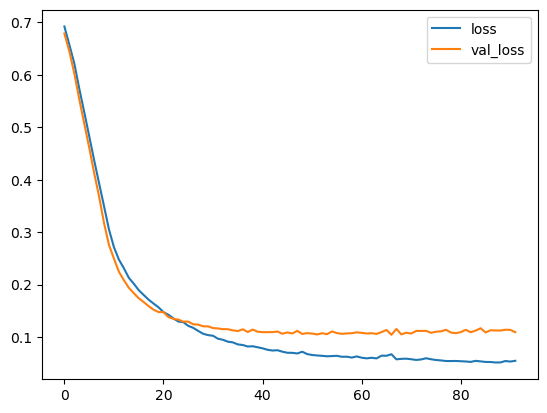

In [37]:
model_loss.plot()

In [38]:
from tensorflow.keras.layers import Dropout

In [40]:
model=Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [41]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 3s 37ms/step - loss: 0.7058 - val_loss: 0.6812
Epoch 2/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6810 - val_loss: 0.6678
Epoch 3/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6654 - val_loss: 0.6533
Epoch 4/600
14/14 [==============================] - 0s 19ms/step - loss: 0.6513 - val_loss: 0.6384
Epoch 5/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6355 - val_loss: 0.6204
Epoch 6/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6258 - val_loss: 0.6015
Epoch 7/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6131 - val_loss: 0.5825
Epoch 8/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6022 - val_loss: 0.5609
Epoch 9/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5647 - val_loss: 0.5333
Epoch 10/600
14/14 [==============================] - 0s 17ms/step - loss: 0.5378 - val_loss: 0.4981

14/14 [==============================] - 0s 8ms/step - loss: 0.1069 - val_loss: 0.0791
Epoch 83/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1121 - val_loss: 0.0887
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1310 - val_loss: 0.0825
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1369 - val_loss: 0.0859
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1101 - val_loss: 0.0906
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0990 - val_loss: 0.0844
Epoch 88/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1195 - val_loss: 0.0885
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1171 - val_loss: 0.0891
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1211 - val_loss: 0.0790
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1195 - val_loss: 0.0921
Epoch 92/600


In [42]:
model_loss2=pd.DataFrame(model.history.history)

<Axes: >

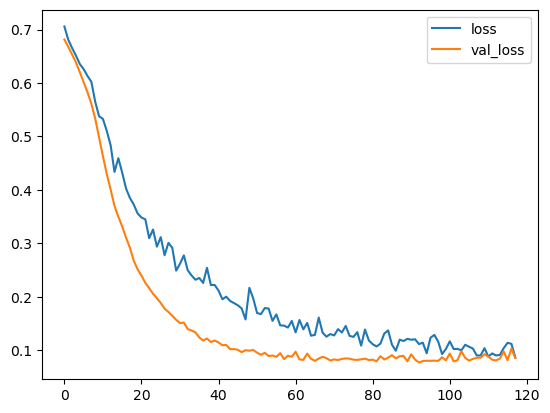

In [43]:
model_loss2.plot()

In [48]:
predictions=model.predict(X_test)

5/5 [==============================] - 0s 6ms/step


In [52]:
predictions=np.where(predictions> 0.5, 1,0)


In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [55]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
